# The Stochastic Journey



Figure 1.1

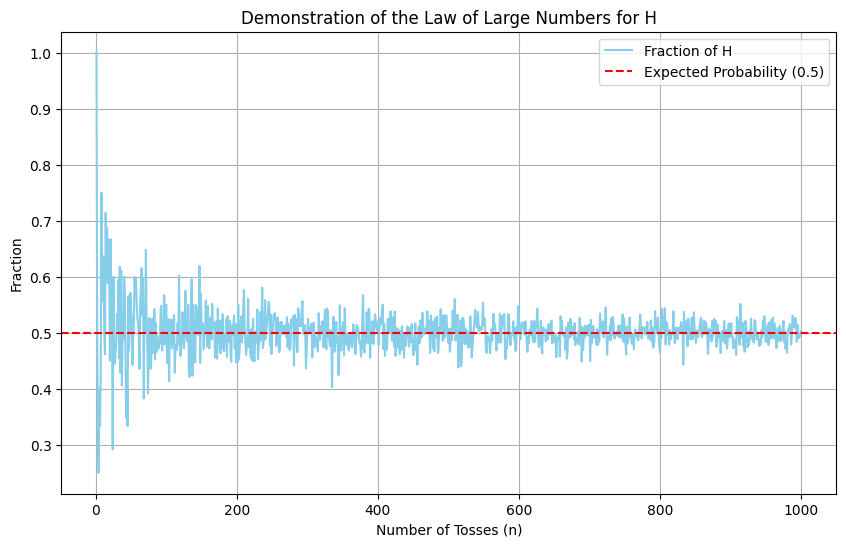

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_coin_tosses(n, outcome):
    # Generate a random list of 'H' (heads) and 'T' (tails)
    tosses = np.random.choice(['H', 'T'], size=n)

    # Calculate the fraction of the specified outcome (heads or tails)
    if outcome == 'H':
        fraction = np.sum(tosses == 'H') / n  # Count heads and divide by total tosses
    elif outcome == 'T':
        fraction = np.sum(tosses == 'T') / n  # Count tails and divide by total tosses
    else:
       raise ValueError("Outcome must be 'H' or 'T'")  # Raise an error if the outcome is invalid
    return fraction  # Return the calculated fraction

def demonstrate_lln(max_n, outcome):
    # Create an array of toss counts from 1 to max_n
    n_values = np.arange(1, max_n + 1)
    fractions = []  # List to store the fractions for each number of tosses

    # Loop through each number of tosses
    for n in n_values:
        fraction = simulate_coin_tosses(n, outcome)  # Simulate coin tosses and get the fraction
        fractions.append(fraction)  # Store the fraction in the list

    # Set up the plot
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, fractions, label=f'Fraction of {outcome}', color='skyblue')  # Plot fractions
    plt.axhline(0.5, color='red', linestyle='--', label='Expected Probability (0.5)')  # Add a line for expected probability
    plt.title(f'Demonstration of the Law of Large Numbers for {outcome}')  # Title for the plot
    plt.xlabel('Number of Tosses (n)')  # Label for the x-axis
    plt.ylabel('Fraction')  # Label for the y-axis
    plt.legend()  # Show the legend
    plt.grid()  # Add a grid to the plot
    plt.show()  # Display the plot

# Example usage
max_n = 1000  # Set the maximum number of tosses
outcome = 'H'  # Specify 'H' (heads) or 'T' (tails) for the simulation
demonstrate_lln(max_n, outcome)  # Run the demonstration

Figure 1.2.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_switching_strategy(n, strategy='alternate_switch'):
    """
    Simulate a coin toss game where the betting strategy alternates between heads and tails
    or switches randomly while maintaining a 1:1 ratio of heads and tails bets.

    Parameters:
    n (int): Number of coin tosses
    strategy (str): 'alternate_switch' for alternating between heads and tails or 'random_switch'
                    for randomly switching while keeping a 1:1 ratio.

    Returns:
    tuple: Fractions of heads, tails, number of bets on heads, number of bets on tails,
           total heads, total tails, total correct guesses, total wrong guesses, and outcomes.
    """

    outcomes = []  # To store the outcomes of each coin toss
    bet_heads_count = 0
    bet_tails_count = 0
    correct_guesses = 0
    wrong_guesses = 0
    current_bet = 'H'  # Start by betting on heads
    available_switches = ['H', 'T']  # Choices for betting

    for i in range(n):
        toss = np.random.choice(['H', 'T'])  # Random coin toss
        outcomes.append(toss)

        # Check if the bet is correct
        if toss == current_bet:
            correct_guesses += 1
        else:
            wrong_guesses += 1

        # Count the bet for the current strategy
        if current_bet == 'H':
            bet_heads_count += 1
        else:
            bet_tails_count += 1

        # Implement the chosen strategy
        if strategy == 'alternate_switch':
            # Alternate the bet between heads and tails
            current_bet = 'T' if current_bet == 'H' else 'H'

        elif strategy == 'random_switch':
            # Randomly switch between heads and tails while maintaining 1:1 ratio
            if bet_heads_count == bet_tails_count:
                # Randomly choose between heads and tails if equal number of bets
                current_bet = np.random.choice(available_switches)
            elif bet_heads_count > bet_tails_count:
                # Force a bet on tails if heads bets exceed tails
                current_bet = 'T'
            else:
                # Force a bet on heads if tails bets exceed heads
                current_bet = 'H'

    # Calculate the fraction of heads and tails
    fraction_heads = np.sum(np.array(outcomes) == 'H') / n
    fraction_tails = np.sum(np.array(outcomes) == 'T') / n

    # Calculate total heads and tails
    total_heads = np.sum(np.array(outcomes) == 'H')
    total_tails = np.sum(np.array(outcomes) == 'T')

    return fraction_heads, fraction_tails, bet_heads_count, bet_tails_count, total_heads, total_tails, correct_guesses, wrong_guesses, outcomes

# Parameters
num_tosses = 10000  # Total number of tosses
strategy_choice = 'random_switch'  # Change to 'alternate_switch' for alternating strategy

# Simulate the coin toss game with the selected switching strategy
results = simulate_switching_strategy(num_tosses, strategy=strategy_choice)
fraction_heads, fraction_tails, bet_heads_count, bet_tails_count, total_heads, total_tails, correct_guesses, wrong_guesses, outcomes = results

# Statistics
total_bets = bet_heads_count + bet_tails_count

# Plotting results
labels = ['Heads', 'Tails']
fractions = [fraction_heads, fraction_tails]

plt.bar(labels, fractions, color=['blue', 'orange'])
plt.axhline(0.5, color='red', linestyle='--', label='Expected 50%')
plt.ylabel('Fraction')
plt.title(f'Outcome of {num_tosses} Coin Tosses with {strategy_choice.replace("_", " ").capitalize()}')
plt.legend()
plt.ylim(0, 1)
plt.show()

# Report results
print(f"Fraction of Heads: {fraction_heads:.2f}")
print(f"Fraction of Tails: {fraction_tails:.2f}")
print(f"Total Heads: {total_heads}")
print(f"Total Tails: {total_tails}")
print(f"Total bets on Heads: {bet_heads_count}")
print(f"Total bets on Tails: {bet_tails_count}")
print(f"Total Correct Guesses: {correct_guesses}")
print(f"Total Wrong Guesses: {wrong_guesses}")


Figure 2.1.

    Tosses      Heads      Tails     Posterior (Fair)
         0          0          0              0.50000
         1          0          1              0.62500
         3          0          3              0.82237
         5          2          3              0.70256
        25         11         14              0.96924
       100         48         52              0.99997
      1000        488        512              1.00000


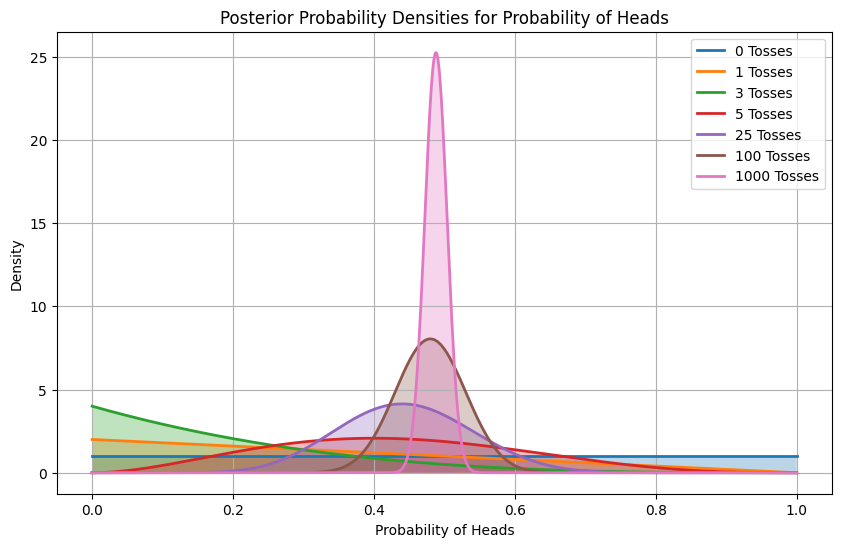

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

def prior_probability():
    """
    Return the prior probability of the coin being fair.

    We start with an initial neutral belief that the coin is fair with probability 0.5.
    """
    return 0.5

def update_posterior(n_heads, n_tails, prior_alpha=1, prior_beta=1):
    """
    Update the posterior distribution for the probability of heads using the Beta distribution.

    Parameters:
    n_heads (int): Number of heads observed
    n_tails (int): Number of tails observed
    prior_alpha (int): Prior alpha parameter (default is 1 for a uniform prior)
    prior_beta (int): Prior beta parameter (default is 1 for a uniform prior)

    Returns:
    alpha (int): Updated alpha parameter for the Beta distribution (posterior)
    beta_param (int): Updated beta parameter for the Beta distribution (posterior)
    """
    alpha = prior_alpha + n_heads
    beta_param = prior_beta + n_tails
    return alpha, beta_param

def posterior_fair(n_heads, n_tails):
    """
    Calculate the posterior probability of the coin being fair using Bayes' Theorem.

    Parameters:
    n_heads (int): Number of heads observed
    n_tails (int): Number of tails observed

    Returns:
    float: Posterior probability that the coin is fair
    """
    prior_fair = prior_probability()

    # Likelihood of data given the coin is fair and biased
    likelihood_f = likelihood_fair(n_heads, n_tails)
    likelihood_b = likelihood_biased(n_heads, n_tails)

    # Total probability of observing the data
    total_likelihood = likelihood_f * prior_fair + likelihood_b * (1 - prior_fair)

    # Posterior probability using Bayes' Theorem
    posterior = (likelihood_f * prior_fair) / total_likelihood

    return posterior

def likelihood_fair(n_heads, n_tails):
    """
    Calculate the likelihood of observing the data given that the coin is fair.
    """
    return 0.5 ** (n_heads + n_tails)

def likelihood_biased(n_heads, n_tails, theta=0.7):
    """
    Calculate the likelihood of observing the data given that the coin is biased.
    """
    return (theta ** n_heads) * ((1 - theta) ** n_tails)

def simulate_tosses(n_tosses, prob_heads=0.5, seed=None):
    """
    Simulate a series of coin tosses.

    Parameters:
    n_tosses (int): Number of coin tosses
    prob_heads (float): Probability of getting heads (default is 0.5 for a fair coin)
    seed (int): Optional seed for random number generation

    Returns:
    tuple: Number of heads and number of tails observed
    """
    if seed is not None:
        np.random.seed(seed)

    tosses = np.random.choice(['H', 'T'], size=n_tosses, p=[prob_heads, 1 - prob_heads])
    n_heads = np.sum(tosses == 'H')
    n_tails = np.sum(tosses == 'T')

    return n_heads, n_tails

def run_simulation(toss_counts, prior_alpha=1, prior_beta=1, prob_heads=0.5):
    """
    Run the Bayesian coin fairness simulation for multiple sets of toss counts and show the table of posterior probabilities.

    Parameters:
    toss_counts (list): List of numbers of tosses to simulate and calculate posteriors for
    """
    print(f"{'Tosses':>10} {'Heads':>10} {'Tails':>10} {'Posterior (Fair)':>20}")
    print("=" * 50)

    plt.figure(figsize=(10, 6))

    for toss_count in toss_counts:
        n_heads, n_tails = simulate_tosses(toss_count, prob_heads)
        alpha, beta_param = update_posterior(n_heads, n_tails, prior_alpha, prior_beta)
        posterior = posterior_fair(n_heads, n_tails)
        print(f"{toss_count:>10} {n_heads:>10} {n_tails:>10} {posterior:>20.5f}")

        # Plot the posterior distribution for each set of tosses
        plot_combined_posterior(alpha, beta_param, toss_count)

    plt.xlabel("Probability of Heads")
    plt.ylabel("Density")
    plt.title("Posterior Probability Densities for Probability of Heads")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_combined_posterior(alpha, beta_param, toss_count):
    """
    Plot the posterior probability density function for the probability of heads on a combined plot.

    Parameters:
    alpha (int): Alpha parameter for the Beta distribution
    beta_param (int): Beta parameter for the Beta distribution
    toss_count (int): Number of tosses in this set (used for labeling the plot)
    """
    x = np.linspace(0, 1, 1000)
    y = beta.pdf(x, alpha, beta_param)

    plt.fill_between(x, y, alpha=0.3)
    plt.plot(x, y, label=f"{toss_count} Tosses", linewidth=2)

# Example usage: Simulate and plot posterior probability density for each set of tosses
toss_counts = [0, 1, 3, 5, 25, 100, 1000]
run_simulation(toss_counts)

Figure 3.1.

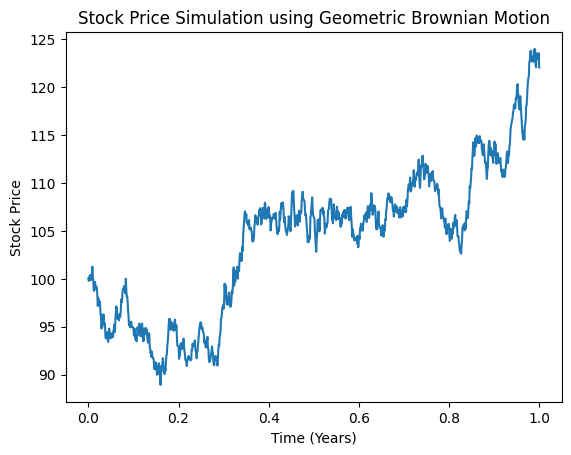

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, N, seed=None):
    """
    Simulate stock prices using the Geometric Brownian Motion model.

    Parameters:
    S0 (float): Initial stock price
    mu (float): Expected return (drift)
    sigma (float): Volatility of the stock
    T (float): Time period (in years)
    N (int): Number of time steps
    seed (int): Optional seed for random number generation

    Returns:
    t (numpy array): Array of time points
    S (numpy array): Simulated stock prices
    """
    if seed is not None:
        np.random.seed(seed)  # Set seed if provided

    dt = T / N  # Time increment

    # Generate random increments (Wiener process)
    dW = np.random.normal(0, np.sqrt(dt), N)  # Random increments
    W = np.cumsum(dW)  # Cumulative sum of Wiener process

    # Time array
    t = np.linspace(0, T, N)

    # Simulate stock price using the GBM formula
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

    return t, S

def plot_stock_price(t, S):
    """
    Plot the stock price over time.

    Parameters:
    t (numpy array): Array of time points
    S (numpy array): Simulated stock prices
    """
    plt.plot(t, S)
    plt.title("Stock Price Simulation using Geometric Brownian Motion")
    plt.xlabel("Time (Years)")
    plt.ylabel("Stock Price")
    plt.show()

# Example usage:
S0 = 100       # Initial stock price
mu = 0.1       # Expected return (drift)
sigma = 0.2    # Volatility
T = 1.0        # Time period (1 year)
N = 1000       # Number of time steps

# Simulate stock prices (random behavior)
t, S = simulate_gbm(S0, mu, sigma, T, N)

# Plot the results
plot_stock_price(t, S)

# If you want reproducibility, call with a fixed seed:
# t, S = simulate_gbm(S0, mu, sigma, T, N, seed=42)

Figure 4.1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

def download_stock_data(ticker, start, end):
    """
    Download historical stock data using yfinance.

    Parameters:
    ticker (str): Stock ticker (e.g., "SPY")
    start (str): Start date (YYYY-MM-DD)
    end (str): End date (YYYY-MM-DD)

    Returns:
    DataFrame: Historical stock data including open, high, low, close prices, and volume.
    """
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data

def calculate_drift_volatility(stock_data):
    """
    Calculate the drift (expected return) and volatility from historical stock data.

    Parameters:
    stock_data (DataFrame): Historical stock data

    Returns:
    tuple: Drift (mu) and volatility (sigma)
    """
    stock_data['Returns'] = stock_data['Close'].pct_change()
    mu = stock_data['Returns'].mean()
    sigma = stock_data['Returns'].std()
    return mu, sigma

def simulate_gbm(S0, mu, sigma, T, N, M):
    """
    Simulate asset prices using Geometric Brownian Motion (GBM).

    Parameters:
    S0 (float): Initial stock price
    mu (float): Expected return (drift)
    sigma (float): Volatility of the stock
    T (float): Time period (in years)
    N (int): Number of time steps
    M (int): Number of simulations

    Returns:
    numpy.ndarray: Simulated price paths
    """
    dt = T / N
    simulated_paths = np.zeros((M, N))
    for i in range(M):
        W = np.random.normal(0, np.sqrt(dt), N).cumsum()  # Wiener process
        time_array = np.linspace(0, T, N)
        S = S0 * np.exp((mu - 0.5 * sigma**2) * time_array + sigma * W)
        simulated_paths[i, :] = S  # Save the simulated price path
    return simulated_paths

def monte_carlo_var(S0, simulated_paths, confidence_level=0.95):
    """
    Calculate Value at Risk (VaR) based on simulated stock prices using Monte Carlo simulation.

    Parameters:
    S0 (float): Initial stock price
    simulated_paths (numpy.ndarray): Simulated price paths
    confidence_level (float): Confidence level for VaR

    Returns:
    tuple: VaR (in dollars), Returns (as percentages)
    """
    final_prices = simulated_paths[:, -1]
    returns = (final_prices - S0) / S0

    # Calculate the VaR at the specified confidence level
    var_percent = np.percentile(returns, (1 - confidence_level) * 100)
    var_dollars = -var_percent * S0  # VaR in dollar amount

    return var_dollars, var_percent, returns

def plot_trajectories(simulated_paths, T):
    """
    Plot the trajectories of simulated price paths.

    Parameters:
    simulated_paths (numpy.ndarray): Simulated price paths
    T (float): Time horizon (in years)
    """
    time_array = np.linspace(0, T, simulated_paths.shape[1])
    plt.plot(time_array, simulated_paths.T, lw=1, alpha=0.5)
    plt.title('Monte Carlo Simulation of SPY Stock Price Trajectories')
    plt.xlabel('Time (Years)')
    plt.ylabel('Stock Price')
    plt.show()

def plot_distribution(returns, VaR, confidence_level=0.95):
    """
    Plot the distribution of simulated returns with the VaR threshold marked.

    Parameters:
    returns (numpy.ndarray): Simulated returns
    VaR (float): Value at Risk in percentage
    confidence_level (float): Confidence level for VaR

    """
    plt.hist(returns, bins=50, edgecolor='black', alpha=0.7)
    plt.axvline(VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR ({confidence_level*100}%): {VaR:.2%}')
    plt.title('Distribution of Simulated Returns with VaR Threshold')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Download actual SPY stock data
ticker = "SPY"
start_date = "2020-01-01"
end_date = "2023-01-01"
spy_data = download_stock_data(ticker, start=start_date, end=end_date)

# Calculate drift (mu) and volatility (sigma) from historical data
mu, sigma = calculate_drift_volatility(spy_data)
print(f"Calculated Drift (mu): {mu:.5f}, Volatility (sigma): {sigma:.5f}")

# Initial stock price (most recent closing price)
S0 = spy_data['Close'][-1]

# Monte Carlo simulation parameters
T = 1.0       # Time horizon (1 year)
N = 1000      # Number of time steps
M = 1000      # Number of simulations
confidence_level = 0.95  # 95% confidence level

# Simulate price paths using Geometric Brownian Motion
simulated_paths = simulate_gbm(S0, mu, sigma, T, N, M)

# Plot the simulated stock price trajectories
plot_trajectories(simulated_paths, T)

# Calculate VaR and plot the distribution of returns
VaR_dollars, VaR_percent, returns = monte_carlo_var(S0, simulated_paths, confidence_level)
print(f"Estimated Value at Risk (VaR) at {confidence_level*100}% confidence level: ${VaR_dollars:.2f} ({VaR_percent:.2%})")

# Plot the distribution of returns with the VaR mark
plot_distribution(returns, VaR_percent, confidence_level)

Figures 5.1. and 5.2.

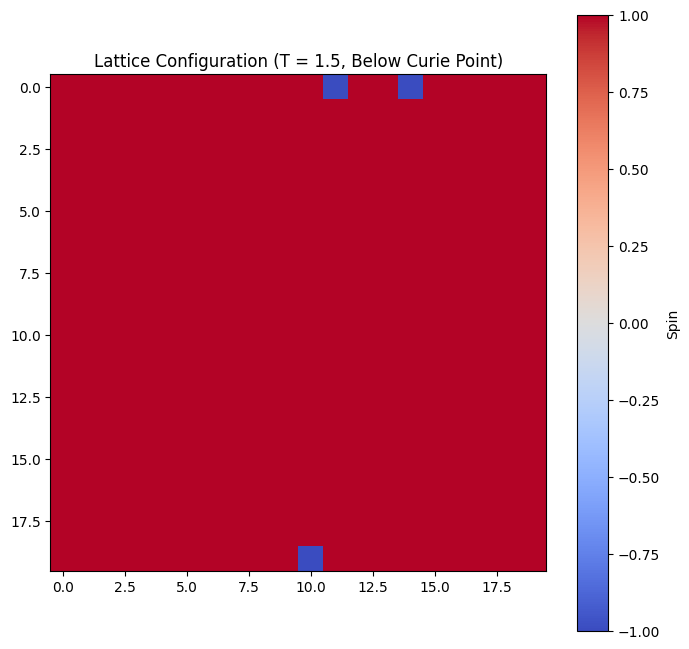

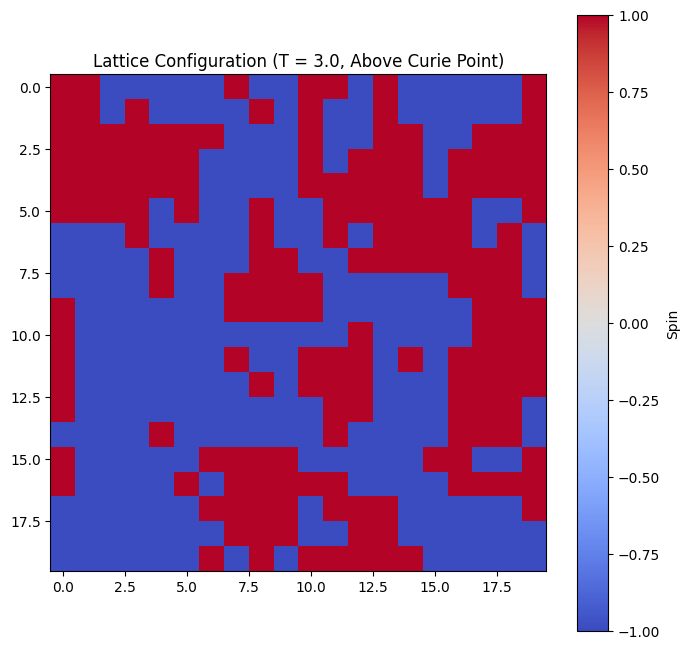

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ising_model(L, T, J=1, num_sweeps=1000):
    """Simulates the 2D Ising model using the Metropolis algorithm."""

    # Initialize the lattice randomly
    lattice = np.random.choice([-1, 1], size=(L, L))

    # Perform Monte Carlo sweeps
    for _ in range(num_sweeps):
        for i in range(L):
            for j in range(L):
                # Calculate energy change for flipping a spin
                x, y = i % L, j % L
                delta_E = 2 * J * lattice[x, y] * (
                    lattice[(x + 1) % L, y] +
                    lattice[(x - 1) % L, y] +
                    lattice[x, (y + 1) % L] +
                    lattice[x, (y - 1) % L]
                )

                # Metropolis acceptance criterion
                if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
                    lattice[x, y] *= -1

    return lattice

# Parameters
L = 20  # Lattice size
num_sweeps = 10000  # Number of Monte Carlo sweeps

# Simulate for temperatures below and above the Curie point
T_below_curie = 1.5  # Below Curie temperature
T_above_curie = 3.0  # Above Curie temperature

lattice_below_curie = ising_model(L, T_below_curie, num_sweeps=num_sweeps)
lattice_above_curie = ising_model(L, T_above_curie, num_sweeps=num_sweeps)

# Plot the lattice configuration before the Curie point
plt.figure(figsize=(8, 8))
plt.imshow(lattice_below_curie, cmap='coolwarm')
plt.title(f'Lattice Configuration (T = {T_below_curie}, Below Curie Point)')
plt.colorbar(label='Spin')
plt.show()

# Plot the lattice configuration after the Curie point
plt.figure(figsize=(8, 8))
plt.imshow(lattice_above_curie, cmap='coolwarm')
plt.title(f'Lattice Configuration (T = {T_above_curie}, Above Curie Point)')
plt.colorbar(label='Spin')
plt.show()